In [2]:
from fastai.tabular.all import *

In [2]:
from kaggle import api
from fastai.torch_basics import *
from fastbook import *
# # from kaggle import api
# # from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *

/Users/jsimonelli/opt/anaconda3/envs/pt/lib/python3.8/site-packages/fastbook/__init__.py:19: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [3]:
creds = ''

In [4]:
def file_extract(fname, dest=None):
    "Extract `fname` to `dest` using `tarfile` or `zipfile`."
    if dest is None:
        dest = Path(fname).parent
    fname = str(fname)
    if fname.endswith("gz"):
        tarfile.open(fname, "r:gz").extractall(dest)
    elif fname.endswith("zip"):
        zipfile.ZipFile(fname).extractall(dest)
    else:
        raise Exception(f"Unrecognized archive: {fname}")

In [5]:
cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)

In [6]:
URLs.path

<function fastai.data.external.URLs.path(url='.', c_key='archive')>

In [4]:
path = URLs.path('bluebook')

In [5]:
path

Path('/Users/jsimonelli/.fastai/archive/bluebook')

In [6]:
file_extract

NameError: name 'file_extract' is not defined

In [10]:
if not path.exists():
    path.mkdir(parents=true)
    api.competition_download_cli('bluebook-for-bulldozers', path=path)
    file_extract(path/'bluebook-for-bulldozers.zip')

In [7]:
path.ls(file_type='text')

(#7) [Path('/Users/jsimonelli/.fastai/archive/bluebook/random_forest_benchmark_test.csv'),Path('/Users/jsimonelli/.fastai/archive/bluebook/Valid.csv'),Path('/Users/jsimonelli/.fastai/archive/bluebook/median_benchmark.csv'),Path('/Users/jsimonelli/.fastai/archive/bluebook/Test.csv'),Path('/Users/jsimonelli/.fastai/archive/bluebook/ValidSolution.csv'),Path('/Users/jsimonelli/.fastai/archive/bluebook/Machine_Appendix.csv'),Path('/Users/jsimonelli/.fastai/archive/bluebook/TrainAndValid.csv')]

In [12]:
df_nn = pd.read_csv(path / 'TrainAndValid.csv', low_memory=False)

In [13]:
df_nn

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric Tons",Texas,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,30NX2,30,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric Tons",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric Tons",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Rubber,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,63333

In [14]:
df_nn['ProductSize'] = df_nn['ProductSize'].astype('category')

In [15]:
sizes = 'Large','Large / Medium','Medium','Small','Mini','Compact'

In [16]:
df_nn['ProductSize'].cat.set_categories(sizes, ordered=True, inplace=True)

/Users/jsimonelli/opt/anaconda3/envs/pt/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [17]:
dep_var = 'SalePrice'

In [18]:
df_nn[dep_var] = np.log(df_nn[dep_var])

In [19]:
df_nn = add_datepart(df_nn, 'saledate')

Not going to trim the features

In [20]:
df_nn_final = df_nn

In [21]:
cont_nn,cat_nn = cont_cat_split(df_nn_final, max_card=9000, dep_var=dep_var)


In [22]:
df_nn_final[cat_nn].nunique()


ModelID                    5281
datasource                    6
YearMade                     73
UsageBand                     3
fiModelDesc                5059
fiBaseModel                1961
fiSecondaryDesc             177
fiModelSeries               123
fiModelDescriptor           140
ProductSize                   6
fiProductClassDesc           74
state                        53
ProductGroup                  6
ProductGroupDesc              6
Drive_System                  4
Enclosure                     6
Forks                         2
Pad_Type                      4
Ride_Control                  3
Stick                         2
Transmission                  8
Turbocharged                  2
Blade_Extension               2
Blade_Width                   6
Enclosure_Type                3
Engine_Horsepower             2
Hydraulics                   12
Pushblock                     2
Ripper                        4
Scarifier                     2
Tip_Control                   3
Tire_Siz

In [23]:
cond = (df_nn.saleYear<2011) | (df_nn.saleMonth<10)
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]
splits = (list(train_idx),list(valid_idx))

In [24]:
cont_nn,cat_nn = cont_cat_split(df_nn_final, max_card=9000, dep_var=dep_var)


In [25]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn_final, procs_nn, cat_nn, cont_nn,
                      splits=splits, y_names=dep_var)

In [26]:
dls = to_nn.dataloaders(1024)


In [27]:
y = to_nn.train.y
y.min(),y.max()

(8.465899, 11.863583)

In [28]:
learn = tabular_learner(dls, y_range=(8,12), layers=[500,250],
                        n_out=1, loss_func=F.mse_loss)

SuggestedLRs(valley=0.0003311311302240938)

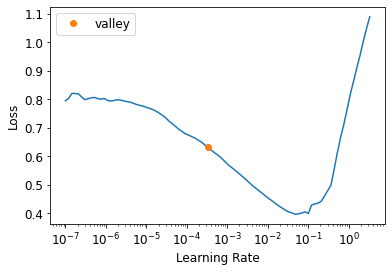

In [29]:
learn.lr_find()


In [30]:
learn.fit_one_cycle(2, 1e-2)


epoch,train_loss,valid_loss,time
0,0.056000,0.057649,00:36
1,0.049570,0.054102,00:35
2,0.042362,0.049695,00:36
3,0.036618,0.051560,00:37
4,0.031678,0.049345,00:38


In [31]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [32]:
preds,targs = learn.get_preds()
r_mse(preds,targs)

0.222138

In [33]:
targs

tensor([[10.0432],
        [10.0858],
        [ 9.3927],
        ...,
        [ 9.3501],
        [ 9.1050],
        [ 8.9554]])

In [34]:
5;

In [35]:
len(targs)

7988

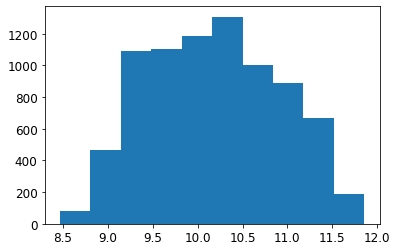

In [36]:
plt.hist(targs.numpy());

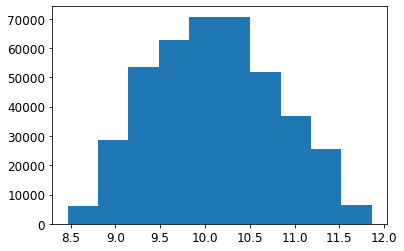

In [37]:
plt.hist(df_nn['SalePrice']);

In [38]:
df_nn['SalePrice']

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
            ...    
412693     9.210340
412694     9.259131
412695     9.433484
412696     9.210340
412697     9.472705
Name: SalePrice, Length: 412698, dtype: float64